In [1328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1329]:
df = pd.read_csv('datasets/cars_data.csv')
df_c = df.copy()

# Cleaning the data!

## Cleaning the numeric data!

In [1331]:
df = df.replace('?', np.nan)


0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object

In [1332]:
df['price'] = pd.to_numeric(df['price'])
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'])
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['stroke'] = pd.to_numeric(df['stroke'])
df['bore'] = pd.to_numeric(df['bore'])
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'])
df['wheel-base'] = pd.to_numeric(df['wheel-base'])
df['num-of-cylinders'] = df['num-of-cylinders'].map({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})


In [1334]:
from sklearn.impute import SimpleImputer
# making the imputer and telling it to replace missing values with the median
imputer = SimpleImputer( strategy='median') # missing_values = np.nan,
# selecting the numeric columns so we don't break the imputer
df_num = df.select_dtypes(include=[np.number])
# print(df_num.shape)
print(len(df_num.columns))
print(df_num.columns)
# median is in statistics_ variable
imputer.fit(df_num)
x = imputer.transform(df_num)
len(x[0])
# creating a dataframe without any missing numeric types
df_num = pd.DataFrame(x, columns = df_num.columns, index=df_num.index)


17
Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [1335]:

# price highway-mpg city-mpg horsepower
# price 5118 to 45400
# hwmpg 16 to 54
# citympg 13 to 49
# hp 48 to 288
print(df_num['price'].describe())
# print(df_num['highway-mpg'].describe())
# print(df_num['city-mpg'].describe())
print(df_num['horsepower'].describe())

count      205.000000
mean     13150.307317
std       7879.121326
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64
count    205.000000
mean     104.165854
std       39.529733
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64


### Scaling
* standardization
    * benefit: less effected by outliers
    * todo: y = (number - mean) / standard diviation
    * toundo: number = y * standard diviation + mean
    * is not bound between 0 - 1
    * Scikit does this with StandardScaler

In [1336]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_num[['horsepower','price','highway-mpg','city-mpg']] = scaler.fit_transform(df_num[['horsepower','price','highway-mpg','city-mpg']])

In [1337]:
test_df = df_num[['horsepower','price','highway-mpg','city-mpg']].copy()
std_obj = {}
standard_deviations = []
means = []
print( test_df['price'].mean() )
print( test_df['price'].std() )
def std(df, cols = []):
#     y = (number - mean) / standard diviation
#     get means
#     get stds
#     loop thru cols
#     loop thru rows and standardize (in array)
#     return (df, std_obj)
    std_obj = {}
    means = {}
    stds = {}
    for col in cols:
        std_obj[col] = {}
        std_obj[col]["mean"] =  df[col].mean()
        std_obj[col]["std"] =  df[col].std()

    for col in cols:
        data = np.array([])
        for i in df.index:
            data = np.append(data, (df[col][i] - std_obj[col]["mean"]) / std_obj[col]["std"] )
        df[col] = data 
    return (df, std_obj)
test_df, std_obj = std(test_df, ['horsepower','price','highway-mpg','city-mpg']) 
print(test_df, std_obj)
print( df_num[['horsepower','price','highway-mpg','city-mpg']])
def undo_std(df, cols = [], std_obj = {}):
#   number = y * standard diviation + mean
#     loop thru cols
#     loop thru rows and un-standardize (in array)
#     return df
    for col in cols:
        data = np.array([])
        for i in df.index:
            data = np.append(data, (df[col][i] * std_obj[col]["std"]) + std_obj[col]["mean"] )
        df[col] = data
    return df
test_df = undo_std(test_df, ['horsepower','price','highway-mpg','city-mpg'], std_obj)
print(test_df, std_obj)
# idx = 0 # this is the only way to iterate through p
# for i in y.index:
#     temp = y['price'][i]
#     data = np.append( data, abs( y['price'][i] - p['price'][idx] ) )
# #     print(temp , p['price'][idx])
# #     print(i)
#     idx += 1


13150.307317073171
7879.121326060378
     horsepower     price  highway-mpg  city-mpg
0      0.172886  0.043748    -0.544725 -0.644974
1      0.172886  0.425135    -0.544725 -0.644974
2      1.260675  0.425135    -0.689938 -0.950684
3     -0.054790  0.101495    -0.109087 -0.186409
4      0.274076  0.545707    -1.270789 -1.103540
..          ...       ...          ...       ...
200    0.248778  0.468922    -0.399512 -0.339264
201    1.412459  0.748141    -0.835151 -0.950684
202    0.754727  1.057820    -1.125577 -1.103540
203    0.046399  1.182834    -0.544725  0.119302
204    0.248778  1.202506    -0.835151 -0.950684

[205 rows x 4 columns] {'horsepower': {'mean': 104.16585365853659, 'std': 39.52973322328356}, 'price': {'mean': 13150.307317073171, 'std': 7879.121326060378}, 'highway-mpg': {'mean': 30.75121951219512, 'std': 6.88644313094182}, 'city-mpg': {'mean': 25.21951219512195, 'std': 6.54214165300162}}
     horsepower    price  highway-mpg  city-mpg
0         111.0  13495.0        

In [1338]:
d = {"price": {"mean": 0, "std": 1} }
d['price']['mean']
# std_obj def std(df, cols = []): return (df, std_obj) def undo_std(df, cols = [], std_obj = {}): return df 
print( df_num['price'].mean() )
df_num, std_obj = std(df_num, cols = ['horsepower','price','highway-mpg','city-mpg'])
print( df_num['price'].mean() )

13150.307317073171
-8.990098638428097e-17


## Cleaning categorical data!

In [1339]:
df_cat = df.select_dtypes(exclude=[np.number])

In [1340]:
# WAS USING THIS TO REPLACE MISSING VALUES WITH SOMETHING USEFUL BUT I'M SHORT ON TIME
# temp = df_cat[(df_cat["num-of-doors"] != "two") & (df_cat["num-of-doors"] != "four") ]
# for i in range( len(temp["num-of-doors"]) ):
#     temp.iloc[i]["num-of-doors"] = "four"

In [1341]:
df_cat = df_cat.fillna("other")

In [1342]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df_cat_encoder = ordinal_encoder.fit_transform(df_cat)
# ordinal_encoder.categories_
# df.price

## Combining the cleaned num and cat dataframes

In [1343]:
# df = df_num.append(df_cat, ignore_index = False, sort=True) THIS CRAP DOESN'T WORK AT ALL (it adds more rows not columns)
for col in df_num:
    df[col] = df_num[col]
for col in df_cat:
    df[col] = df_cat[col]



# Exploring the data!

In [1344]:
# df.hist(bins=50, figsize=(20,15))
# bins are the number of bars you will use to show the data
# figsize defines how big each box will be for graph
# save_fig("attribute_history_gram") this is used in the source code but not mine

# df.show()
# df.info()

In [1345]:
corr_matrix = df.corr() 
corr_matrix
# looking at how the other numberic features relate to median_house_value
corr_matrix['price'].sort_values(ascending=False)

price                1.000000
engine-size          0.860343
curb-weight          0.819817
horsepower           0.749919
width                0.724558
length               0.686567
num-of-cylinders     0.681036
wheel-base           0.584847
bore                 0.532861
height               0.140439
normalized-losses    0.095489
stroke               0.083627
compression-ratio    0.072890
symboling           -0.080149
peak-rpm            -0.107283
city-mpg            -0.668822
highway-mpg         -0.693037
Name: price, dtype: float64

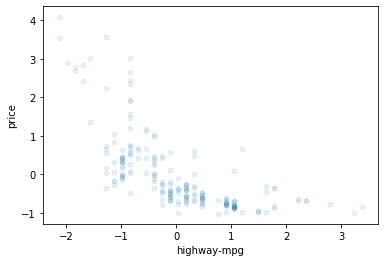

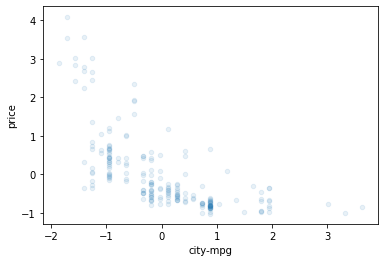

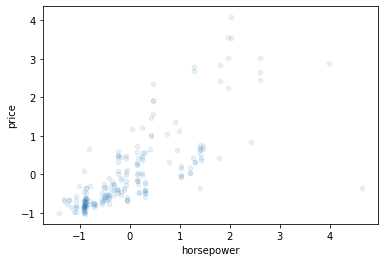

In [1346]:
# df.plot(kind="scatter", x='engine-size', y='price', alpha=0.1) I'm letting this go because getting engine-size seems impossible in production
df.plot(kind="scatter", x='highway-mpg', y='price', alpha=0.1)
df.plot(kind="scatter", x='city-mpg', y='price', alpha=0.1)
df.plot(kind="scatter", x='horsepower', y='price', alpha=0.1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3778e310>,
      dtype=object)

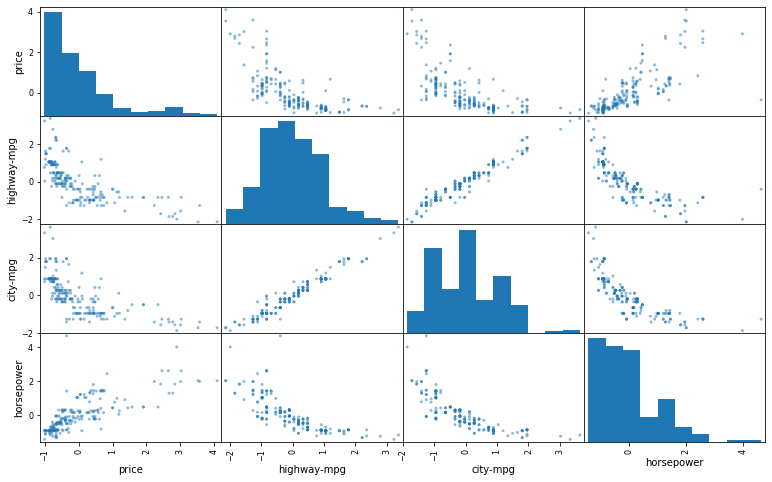

In [1347]:
from pandas.plotting import scatter_matrix
attr = ['price','highway-mpg','city-mpg','horsepower']
scatter_matrix(df[attr], figsize=(13,8))


In [1348]:
# model_data = df[['price','highway-mpg','city-mpg']]
# model_data


# Split data into training and test data

In [1349]:
from sklearn.model_selection import train_test_split # price highway-mpg city-mpg horsepower

train_set, test_set = train_test_split(df[['highway-mpg','city-mpg','horsepower','price']], test_size=0.2, random_state=42)

In [1350]:
# train_set.describe()

In [1351]:
# test_set.describe()

# Build pipeline

In [1352]:
train_set['price'].mean()

-0.0059878844785188545

# Select a model

## Linear Regression

In [1353]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
x = train_set[['highway-mpg','city-mpg','horsepower']]
y = train_set['price']
lin_reg.fit(x,y) # price highway-mpg city-mpg horsepower
print( lin_reg.score(x,y) )
print( lin_reg.coef_ )


0.6238228099797856
[-0.76603623  0.46811383  0.52398427]


In [1354]:
# from sklearn.linear_model import LinearRegression

# lin_reg = LinearRegression()
# lin_reg.fit(housing_prepared, housing_labels)

# some_data = housing.iloc[:4]
# some_labels = housing_labels.iloc[:4]
# some_data_prepared = full_pipeline.transform(some_data)
# print('Predictions:', lin_reg.predict(some_data_prepared))
# print('Lables:',list(some_labels))


## Decision Tree Regressor

In [1355]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [1356]:
# from sklearn.tree import DecisionTreeRegressor

# tree_reg = DecisionTreeRegressor()
# tree_reg.fit(housing_prepared, housing_labels)

# # testing it out
# tree_rmse = rmse(tree_reg, housing_prepared, housing_labels)
# print('Decision Tree Regression RMSE:', tree_rms)

## Random Forest Regression

In [1357]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(x,y)

/Users/sheldonmaygunlogson/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [1358]:
# from sklearn.ensemble import RandomForestRegressor

# forest_reg = RandomForestRegressor()
# forest_reg.fit(housing_prepared, housing_labels)

# forest_rmse = rmse(forest_reg, housing_prepared, housing_labels)
# print('Random Forest Regression RMSE:', forest_rmse)

# scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
# forest_rmse_scores = np.sqrt(-scores)
# # scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
# # tree_rmse_scores = np.sqrt(-scores)
# display_scores(scores)

# Testing the models

## RMSE

In [1359]:
# rmse
from sklearn.metrics import mean_squared_error

def rmse(model, data_prepared, labels):
    predictions = model.predict(data_prepared)
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    return rmse

lin_rmse = rmse(lin_reg, x, y) 
print('Linear Regression RMSE:', lin_rmse)
tree_rmse = rmse(tree_reg, x, y)
print('Decision Tree Regression RMSE:', tree_rmse)
forest_rmse = rmse(forest_reg, x, y)
print('Random Forest Regression RMSE:', forest_rmse)


Linear Regression RMSE: 0.5907861696081874
Decision Tree Regression RMSE: 0.13034878226591437
Random Forest Regression RMSE: 0.22599006549525613


In [1360]:
# from sklearn.metrics import mean_squared_error

# def rmse(model, data_prepared, labels):
#     predictions = model.predict(data_prepared)
#     mse = mean_squared_error(labels, predictions)
#     rmse = np.sqrt(mse)
#     return rmse

# # housing_predictions = lin_reg.predict(housing_prepared)
# # lin_mse = mean_squared_error(housing_labels, housing_predictions)
# # lin_rmse = np.sqrt(lin_mse)
# lin_rmse = rmse(lin_reg, housing_prepared, housing_labels)
# print('Linear Regression RMSE:', lin_rmse)


## Cross Validation

In [1361]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print('Scores:', scores, 'Score len:', len(scores))
    print('Mean:', scores.mean()) 
    print('Standard Deviation:', scores.std())

In [1362]:
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
# tree_rmse_scores = np.sqrt(-scores)

# def display_scores(scores):
#     print('Scores:', scores, 'Score len:', len(scores))
#     print('Mean:', scores.mean()) 
#     print('Standard Deviation:', scores.std())

# display_scores(tree_rmse_scores)

In [1363]:
# # lin_reg
# # tree_reg
# # forest_reg
print('lin_rmse')
scores = cross_val_score(lin_reg, x, y, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)
print('tree_rmse')
scores = cross_val_score(tree_reg, x, y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)
print('forest_rmse')
scores = cross_val_score(forest_reg, x, y, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

lin_rmse
Scores: [0.60384241 0.61125127 0.50411821 0.43381447 0.63215264 0.37646364
 0.39076399 0.68611187 0.95201799 0.88229575] Score len: 10
Mean: 0.6072832244577461
Standard Deviation: 0.1849936921243778
tree_rmse
Scores: [0.49313022 0.28787657 0.20326136 0.35142947 0.48635995 0.42783972
 0.58924453 0.35693355 1.01397633 0.43057809] Score len: 10
Mean: 0.4640629796680316
Standard Deviation: 0.21096745958686372
forest_rmse
Scores: [0.43456463 0.36551917 0.19765494 0.28156631 0.50670352 0.34276593
 0.4136942  0.31962189 0.74559425 0.48357257] Score len: 10
Mean: 0.40912574217612485
Standard Deviation: 0.14291613798746822


In [1364]:
# more testing

In [1365]:
# # lin_reg
# # tree_reg
# # forest_reg

# X_test = strat_test_set.drop('median_house_value', axis=1)
# y_test = strat_test_set['median_house_value'].copy()

# X_test_prepared = full_pipeline.transform(X_test)

# lin_reg_rmse = rmse(lin_reg, X_test_prepared, y_test)
# tree_reg_rmse = rmse(tree_reg, X_test_prepared, y_test)
# forest_reg_rmse = rmse(forest_reg, X_test_prepared, y_test)

# print("lin rmse:", lin_reg_rmse)
# print("tree rmse:", tree_reg_rmse)
# print("forest rmse:", forest_reg_rmse)
# # def rmse(model, data_prepared, labels):

# Saving Models in Pickles!

In [1366]:
import joblib # lin_reg tree_reg forest_reg
joblib.dump(lin_reg, 'models/lin_reg.pkl')
joblib.dump(tree_reg, 'models/tree_reg.pkl')
joblib.dump(forest_reg, 'models/forest_reg.pkl')

['models/forest_reg.pkl']

In [1367]:
lr = joblib.load('models/lin_reg.pkl')
tr = joblib.load('models/tree_reg.pkl')
fr = joblib.load('models/forest_reg.pkl')

x_test = test_set[['highway-mpg','city-mpg','horsepower']]
y_test = test_set['price']

lr_rmse = rmse(lr, x_test, y_test) 
print('Linear Regression RMSE:', lr_rmse)
# print( df['price'].describe() ) 
# tree_rmse = rmse(tree_reg, x, y)
# print('Decision Tree Regression RMSE:', tree_rmse)
# forest_rmse = rmse(forest_reg, x, y)
# print('Random Forest Regression RMSE:', forest_rmse)

Linear Regression RMSE: 0.7315857762573339


# Trying to fix the scaling prediction problem

In [1368]:
# df[['horsepower','price','highway-mpg','city-mpg']] = scaler.fit_transform(df_num[['horsepower','price','highway-mpg','city-mpg']])
# lin_reg tree_reg forest_reg
x = test_set[['highway-mpg','city-mpg','horsepower']]
y = test_set['price']
p = forest_reg.predict(x)
# p = pd.Series(p, name="price").to_frame()
data = np.array([])
idx = 0 # this is the only way to iterate through p
for i in y.index:
    data = np.append( data, abs( y[i] - p[idx] ) )
    _y = int( y[i] * std_obj['price']['std'] + std_obj['price']['mean'] )
    _p = int( p[idx] * std_obj['price']['std'] + std_obj['price']['mean'] )
    print(_y,'\t', _p )
    idx += 1

mean_diff_df = pd.DataFrame()
mean_diff_df['price'] = data
print(mean_diff_df['price'].mean())
mean_diff_df = undo_std(mean_diff_df, ['price'], std_obj)
print(mean_diff_df['price'].mean())
# print(mean_diff_df)
# for i in mean_diff_df.index:
#     print(mean)

30760 	 25050
10295 	 21407
9549 	 9675
11850 	 14204
28248 	 29639
7799 	 6909
7788 	 7559
9258 	 8574
10198 	 10719
7775 	 8335
13295 	 15397
8238 	 8227
18280 	 20611
9988 	 11049
40960 	 42370
6488 	 6461
5151 	 7342
12629 	 13195
8189 	 7806
9960 	 10347
8495 	 10260
13499 	 14774
8249 	 6909
6479 	 7252
6692 	 6691
41315 	 25050
9639 	 11139
13415 	 17180
7999 	 6909
12940 	 17180
25552 	 29639
6229 	 6691
7898 	 8419
21485 	 16654
7689 	 10502
28176 	 29639
11259 	 12331
10945 	 12505
10295 	 7839
14489 	 13195
7463 	 7719
0.2689517010219521
15269.410400275448


In [1238]:
# std_obj def std(df, cols = []): return (df, std_obj) def undo_std(df, cols = [], std_obj = {}): return df 
# df_num[['horsepower','price','highway-mpg','city-mpg']]
temp_df = test_set[['highway-mpg','city-mpg','horsepower','price']]
x = temp_df[['highway-mpg','city-mpg','horsepower']] # .iloc[:3]
p = lin_reg.predict(x)
p = pd.Series(p, name="price").to_frame() # this turns the np array coming from predict into series then df
y = test_set[['price']] # .iloc[:3]
# print( type(test_set[['highway-mpg','city-mpg','horsepower','price']]) )
# print( type(x) )
# print( test_set.shape )
# print( temp_df.shape ) 
# print( x.shape )
# print( p.shape )
# print( y.shape )
# print(type(p))
data = np.array([])
# print(y)
# print(p.index)
idx = 0 # this is the only way to iterate through p
for i in y.index:
    temp = y['price'][i]
    data = np.append( data, abs( y['price'][i] - p['price'][idx] ) )
#     print(temp , p['price'][idx])
#     print(i)
    idx += 1

temp_df['price'] = data
# df_num[['horsepower','price','highway-mpg','city-mpg']] 
# = scaler.fit_transform(df_num[['horsepower','price','highway-mpg','city-mpg']])
print(p.iloc[:4])
print(temp_df.iloc[:4])
temp_df[['horsepower','price','highway-mpg','city-mpg']] = undo_std(temp_df, ['horsepower','price','highway-mpg','city-mpg'], std_obj)# scaler.inverse_transform(temp_df)
test_set[['horsepower','price','highway-mpg','city-mpg']]  = undo_std(test_set, ['horsepower','price','highway-mpg','city-mpg'], std_obj)# scaler.inverse_transform(test_set)
# df['horsepower','price','highway-mpg','city-mpg'] = scaler.inverse_transform(df['horsepower','price','highway-mpg','city-mpg'])
# print(p['price'].mean())
# print(data.mean())
# print(temp_df['price'].mean())
# print(test_set['price'].mean())

# print(data[:4])
print(temp_df.iloc[:4])
print(test_set.iloc[:4])
df = pd.read_csv('datasets/cars_data.csv')
print(df[['horsepower','price','highway-mpg','city-mpg']].iloc[15])
# print(p.iloc[:4])
# print(p['price'].mean())
# print(y['price'].mean())
# print(temp_df)

      price
0  1.322281
1  1.030661
2 -0.352202
3  0.058227
     highway-mpg  city-mpg  horsepower     price
15     -1.270789 -1.409250    1.969003  0.912701
9      -1.270789 -1.409250    1.412459  1.393050
100     0.471765  0.272157   -0.181278  0.104867
132    -0.399512 -0.644974    0.147589  0.223259
     highway-mpg  city-mpg  horsepower  price
15          22.0      16.0        22.0   16.0
9           22.0      16.0        22.0   16.0
100         34.0      27.0        34.0   27.0
132         28.0      21.0        28.0   21.0
     highway-mpg  city-mpg  horsepower  price
15          22.0      16.0        22.0   16.0
9           22.0      16.0        22.0   16.0
100         34.0      27.0        34.0   27.0
132         28.0      21.0        28.0   21.0
horsepower       182
price          30760
highway-mpg       22
city-mpg          16
Name: 15, dtype: object


In [1040]:
import joblib
# to save
joblib.dump(my_model, 'my_model.pkl')
# to read from pickel ( .pkl ) file
my_model_loaded = joblib.load('my_model.pkl')

NameError: name 'my_model' is not defined